In [119]:
from yellowbrick.features import Rank2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")

In [275]:
# Load data and rename the columns to match the standart
data = pd.read_excel('./dataset_cleaned_vis.xlsx')
data.rename(columns={'Project phases':'Enginneering Services Category','Approx Construction Cost':'Scale of Work',"Project manager’s experience (years)":"Project manager's experience",'Estimated Project Duration (monthly)':'Project Duration'},inplace=True)
data_numeric = data.drop(['Project Location', 'Country','Year of the project'], axis=1)

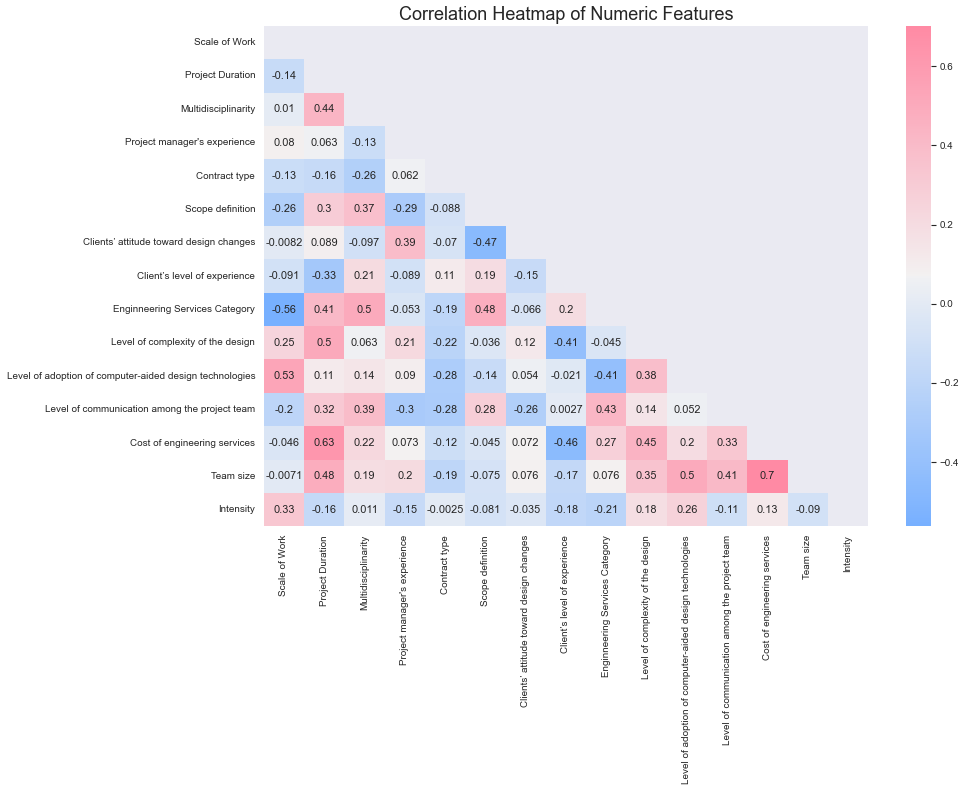

In [200]:
# Correlation Heatmap of Numeric Features

# Demonstrate correlation between different variables via a heatmap
corr = data_numeric.corr()

# Set up the plot configurations
f, ax2 = plt.subplots(figsize=(15, 10), dpi=65) 

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure the colormap
cmap = sns.diverging_palette(250, 360, s=100, l=71, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap = cmap)

# Configure the title
plt.title('Correlation Heatmap of Numeric Features', fontsize=20)
plt.show()

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)



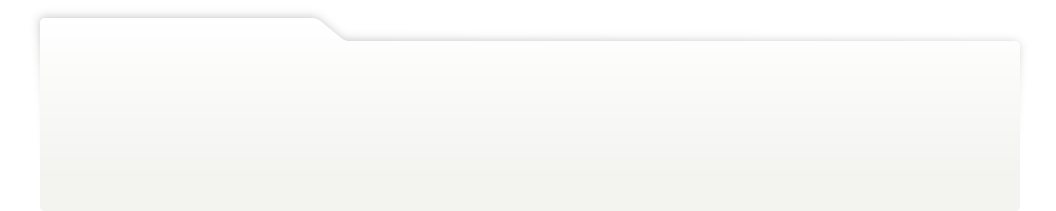
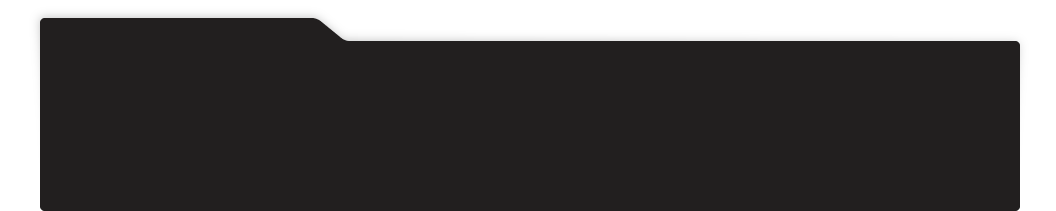
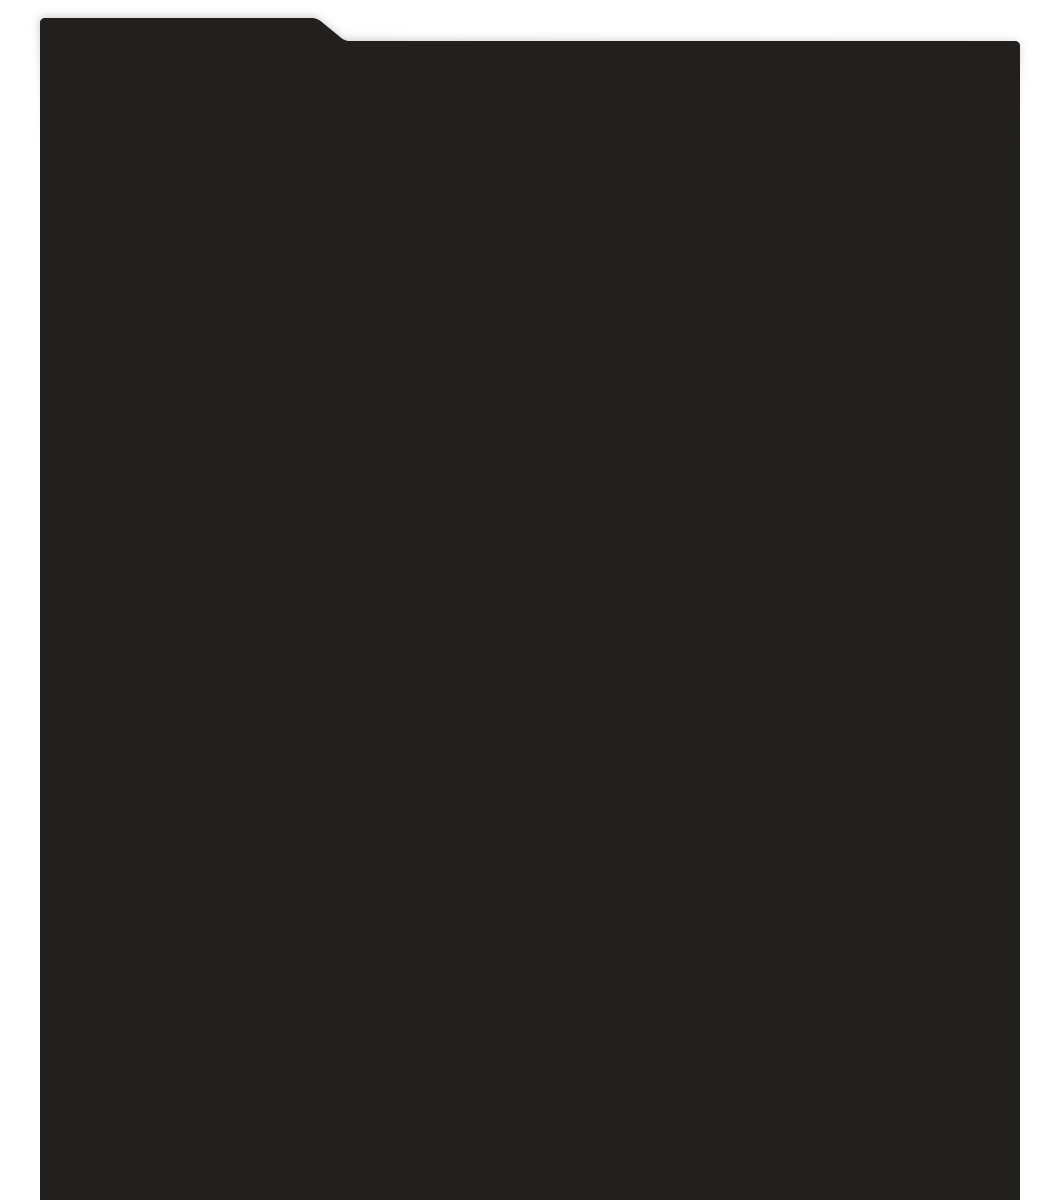
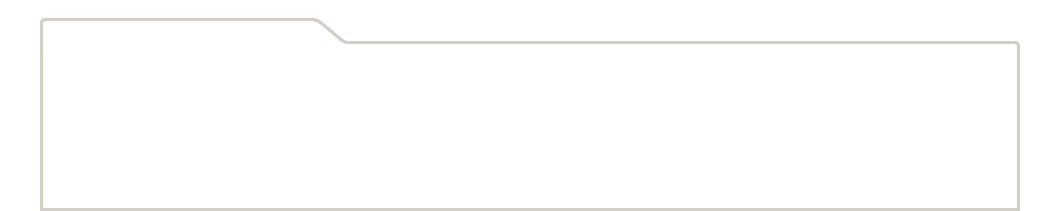
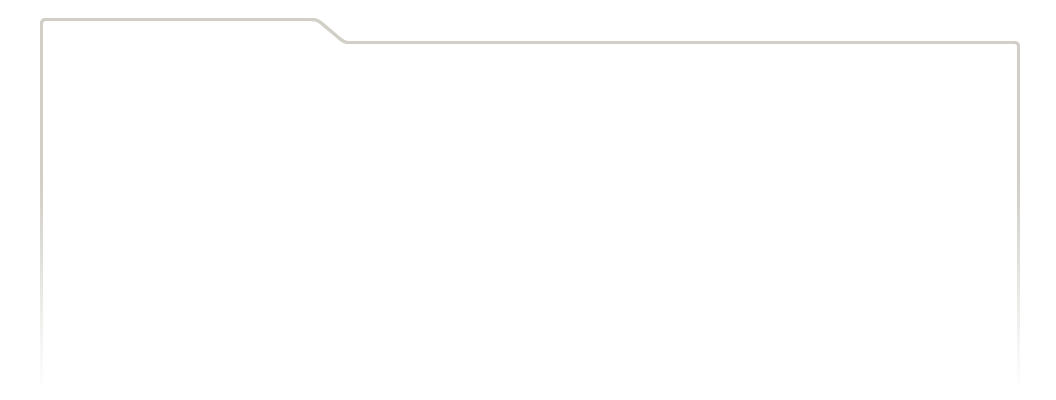
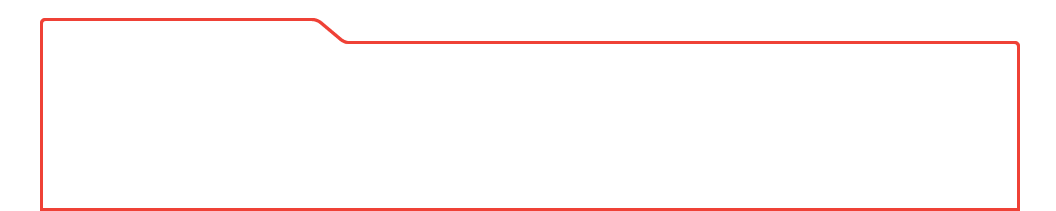
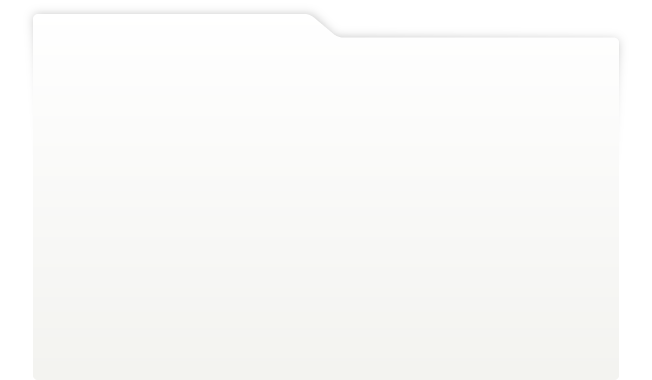
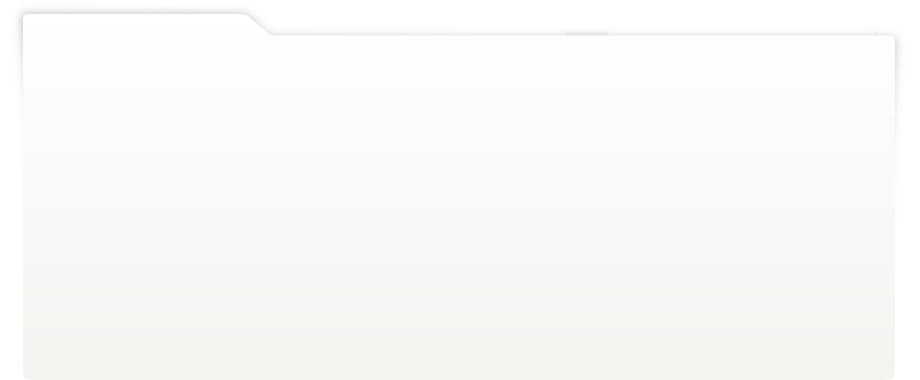
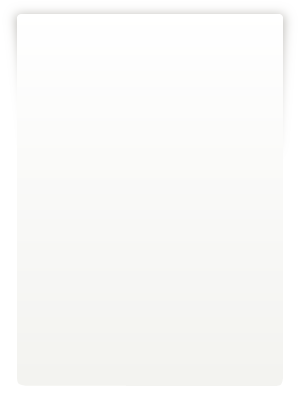
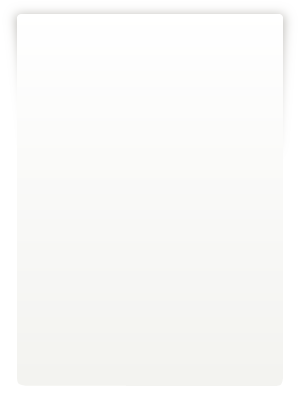
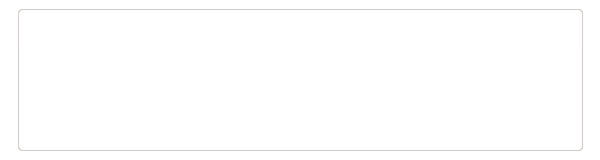
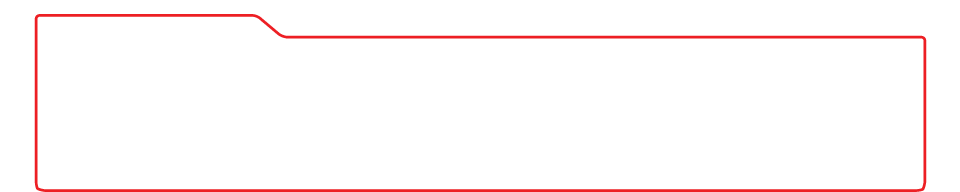
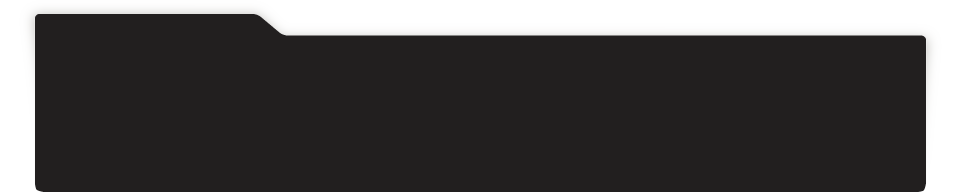
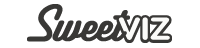
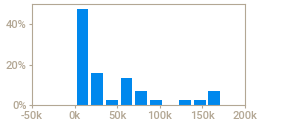
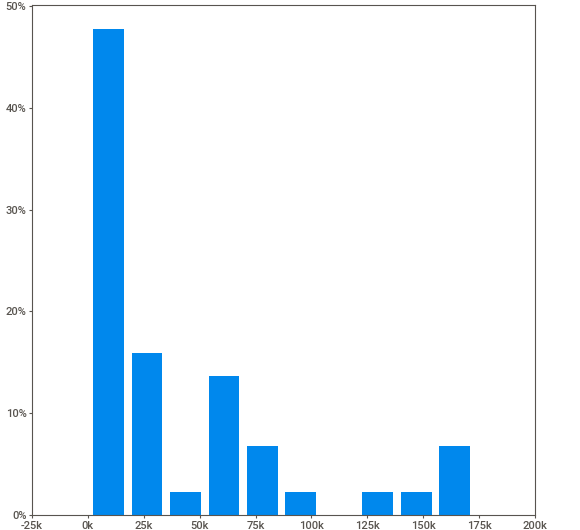
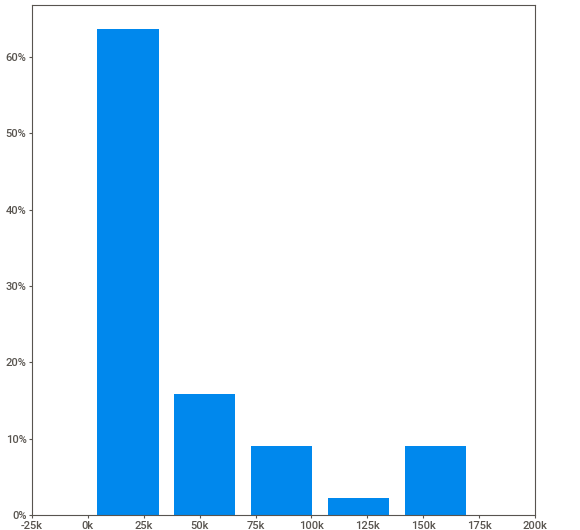
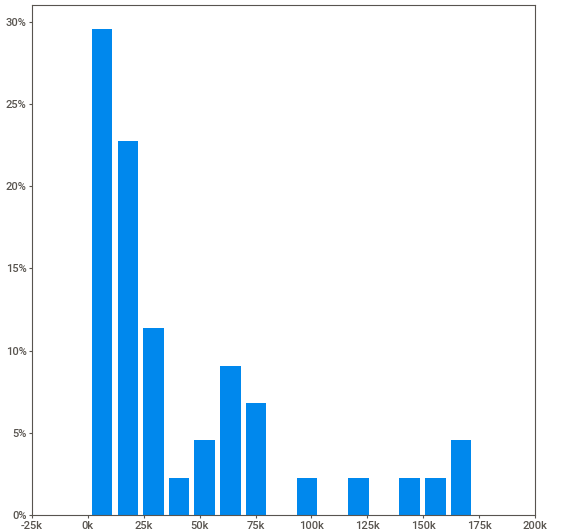
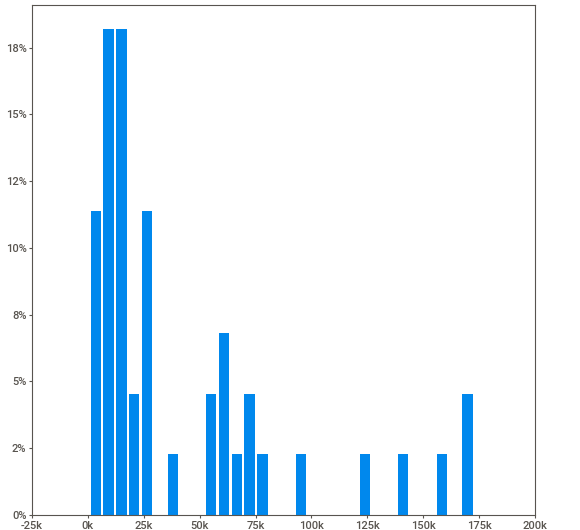
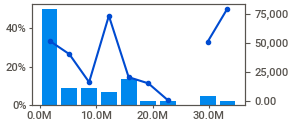
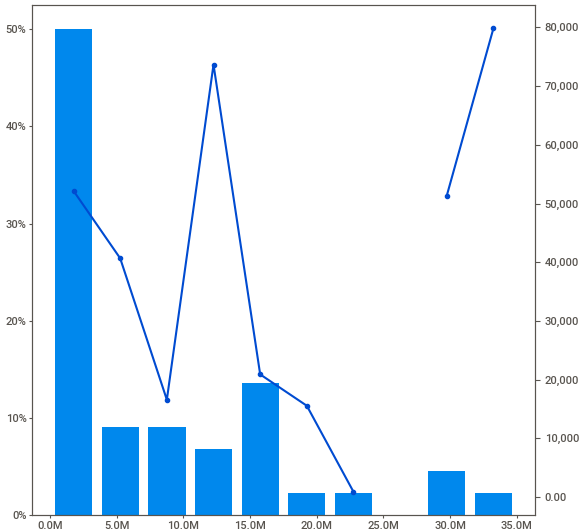
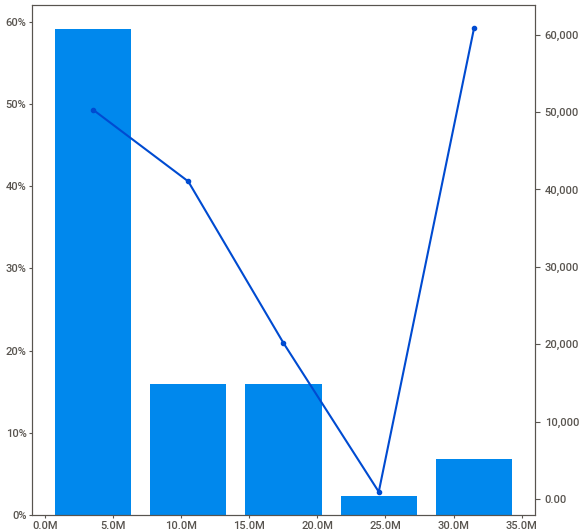
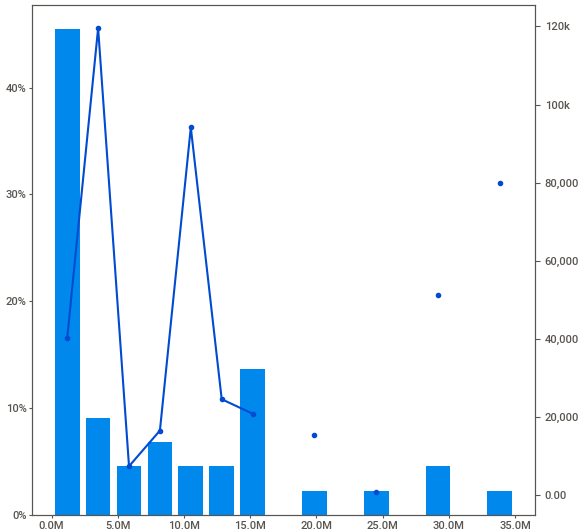
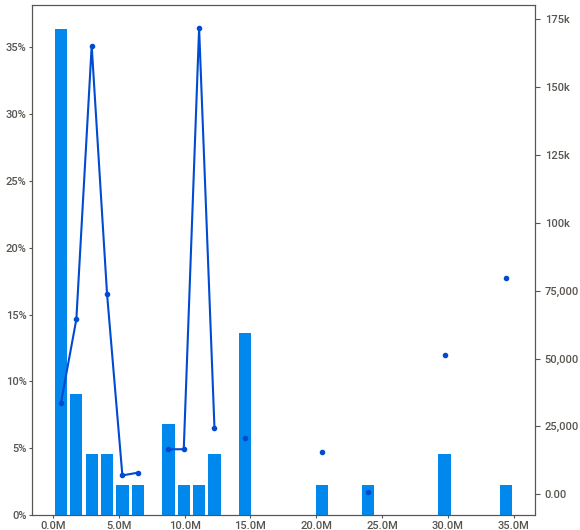
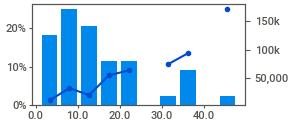
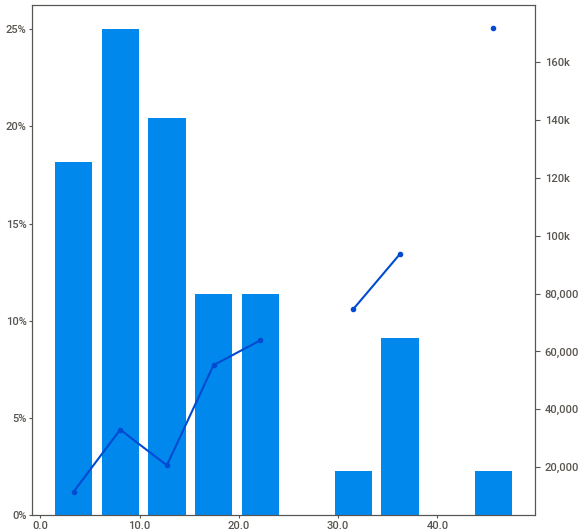
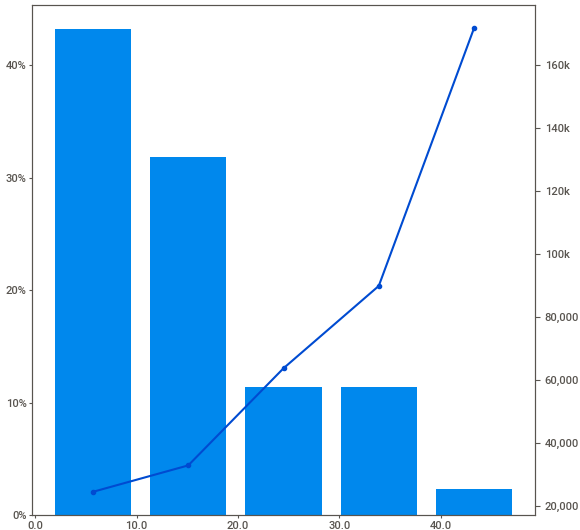
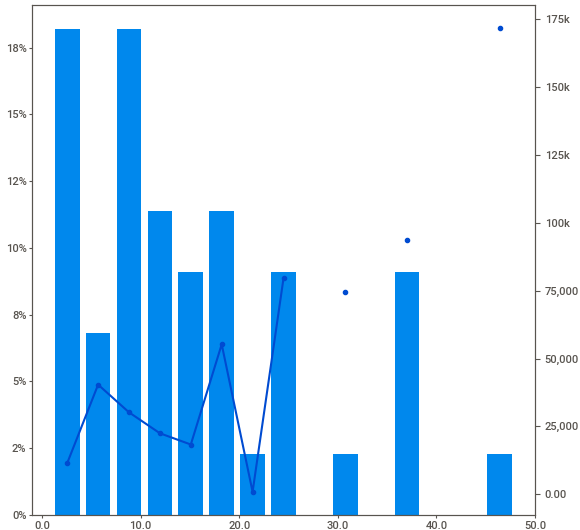
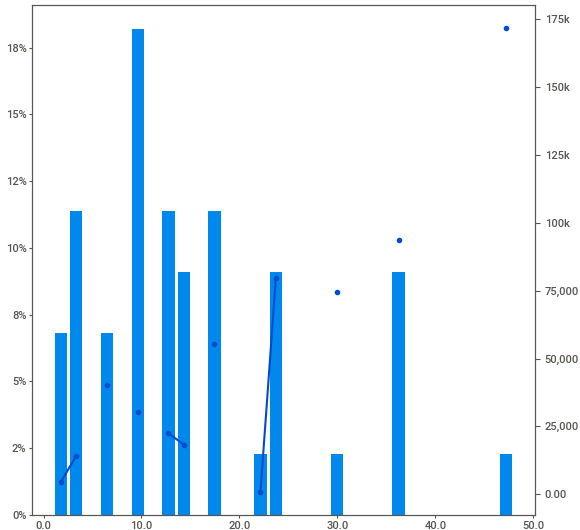
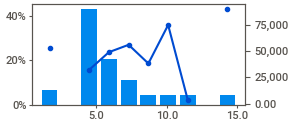
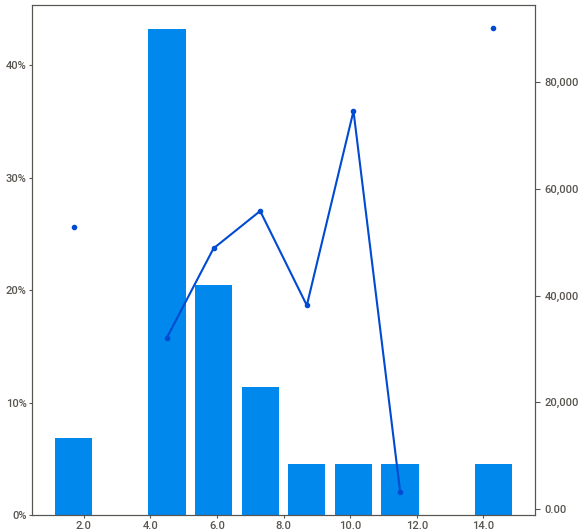
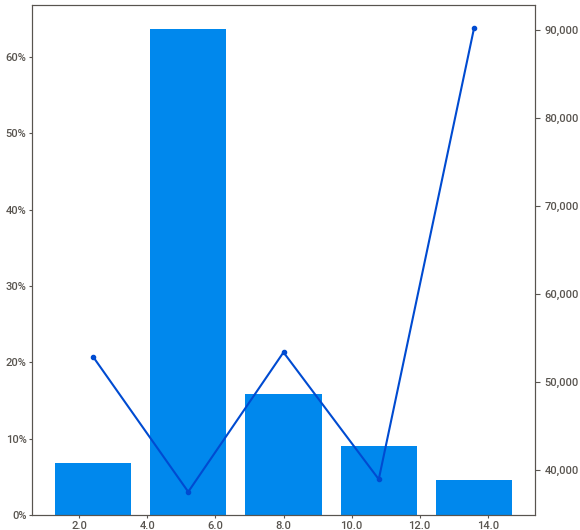
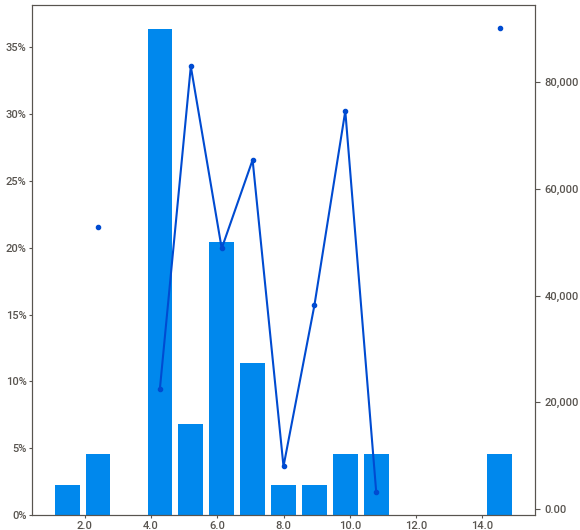
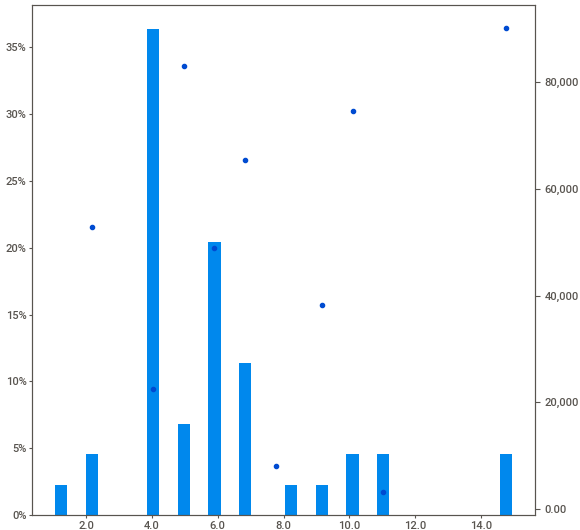
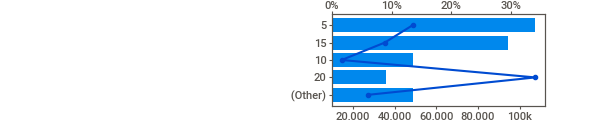
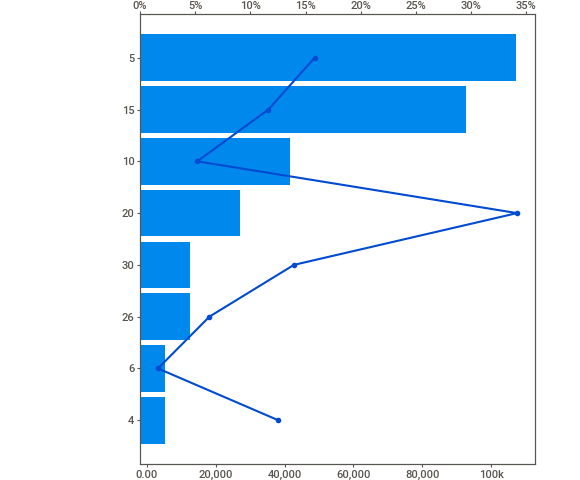
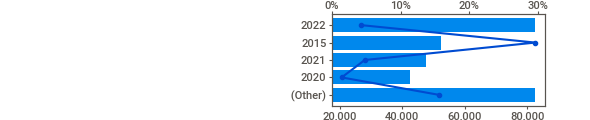
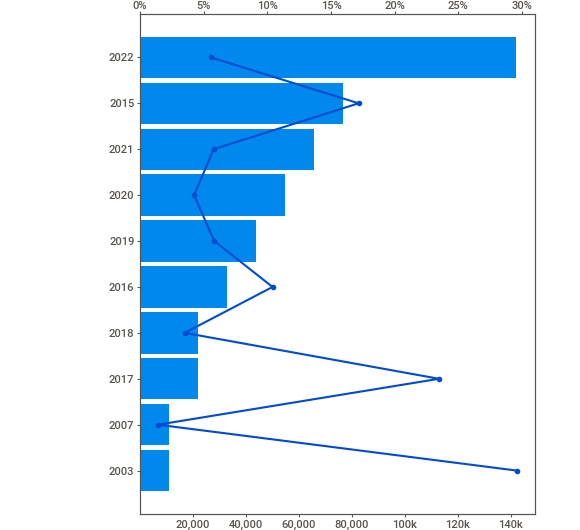
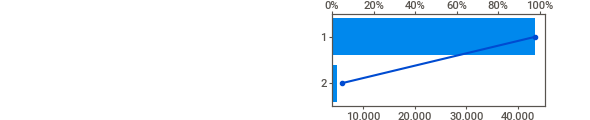
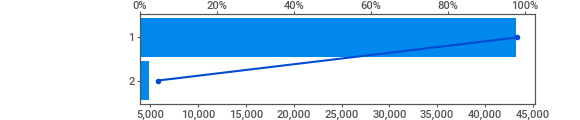
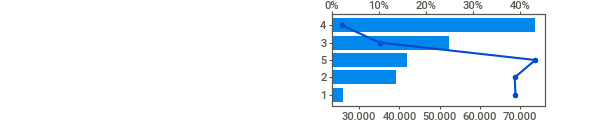
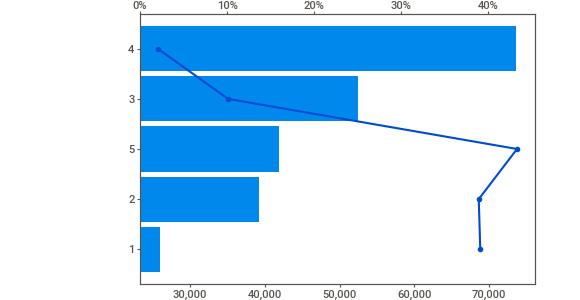
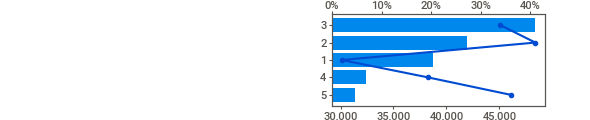
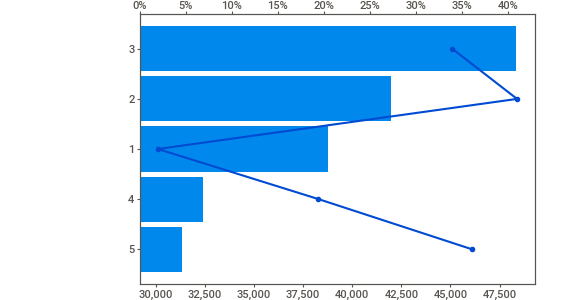
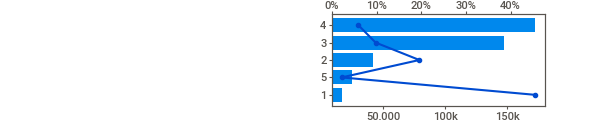
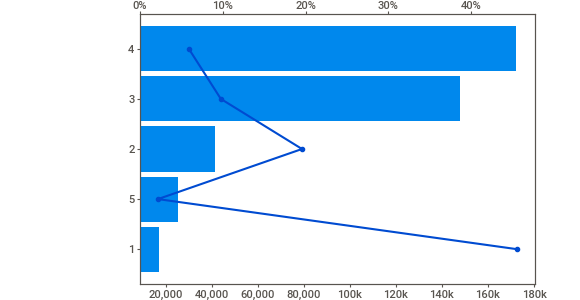
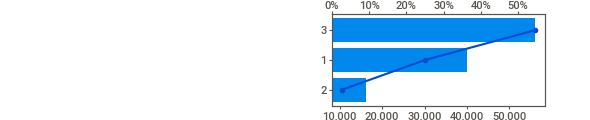
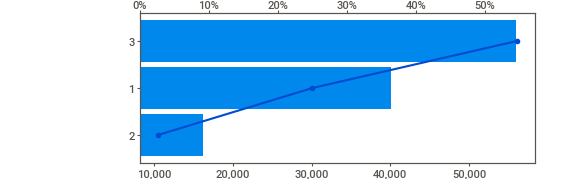
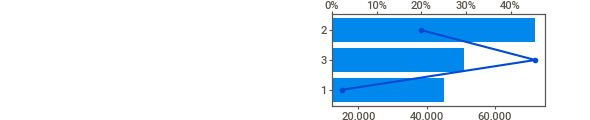
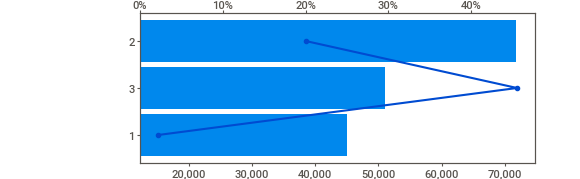
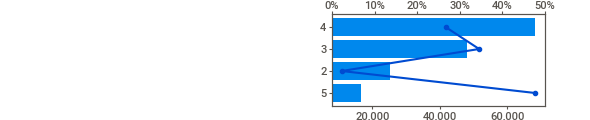
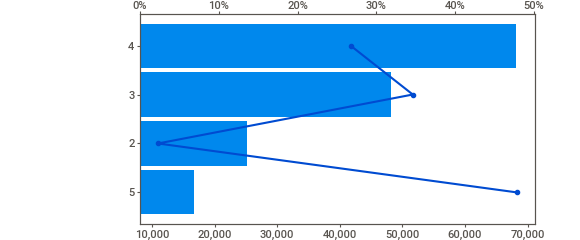
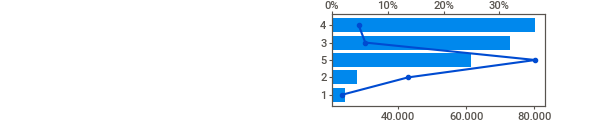
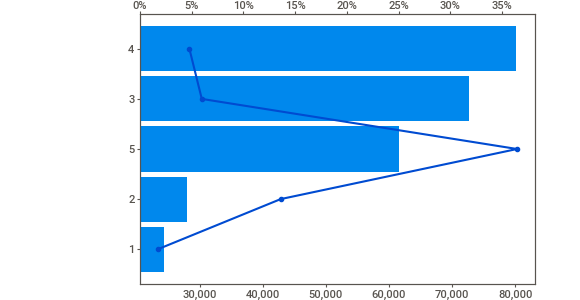
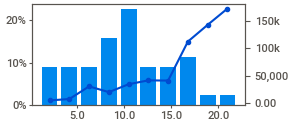
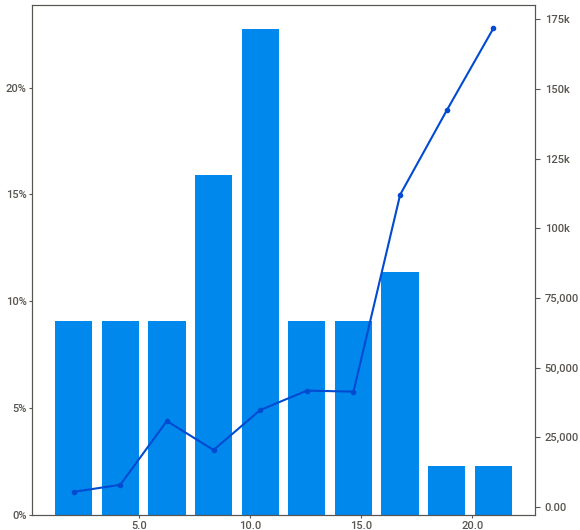
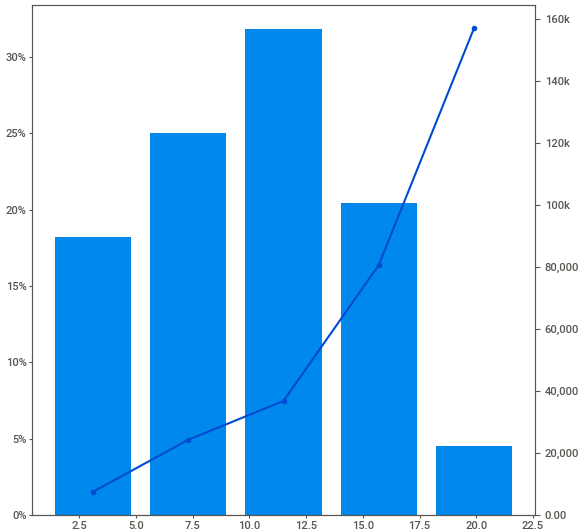
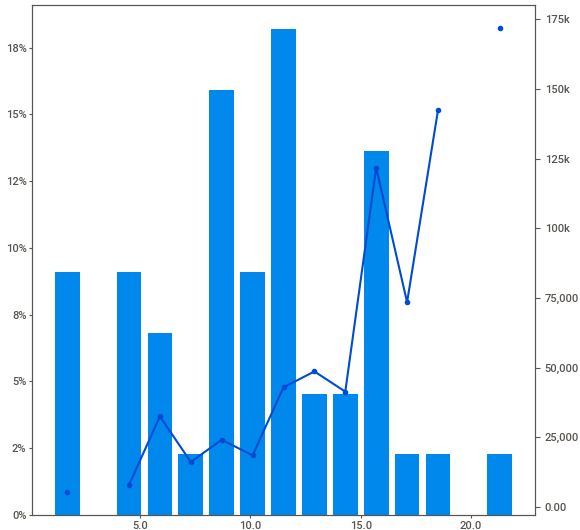
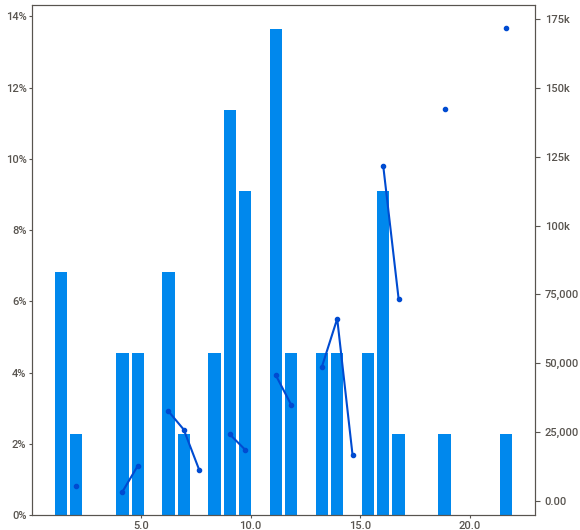
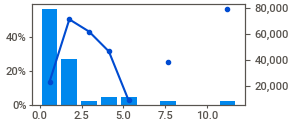
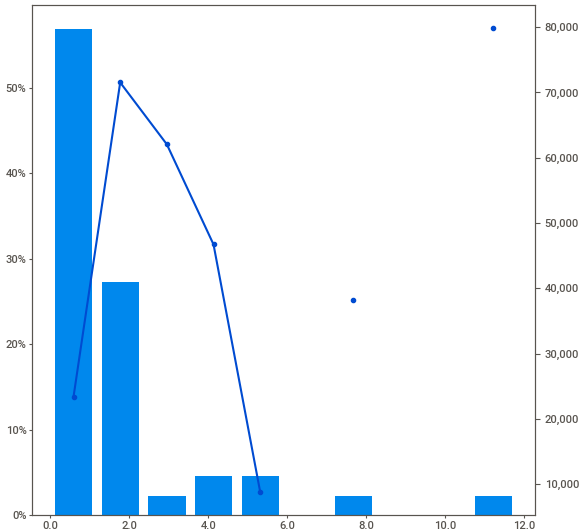
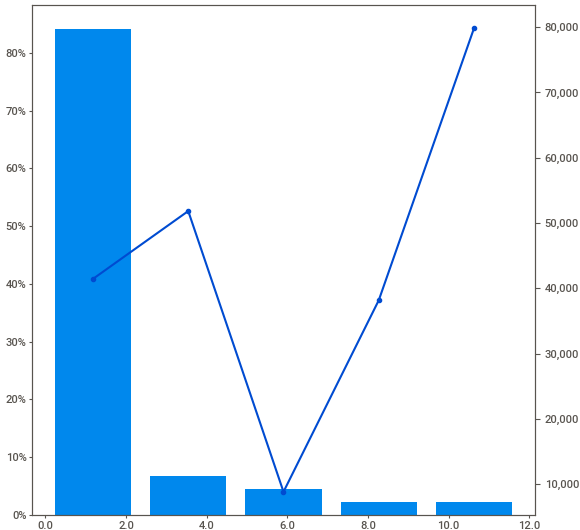
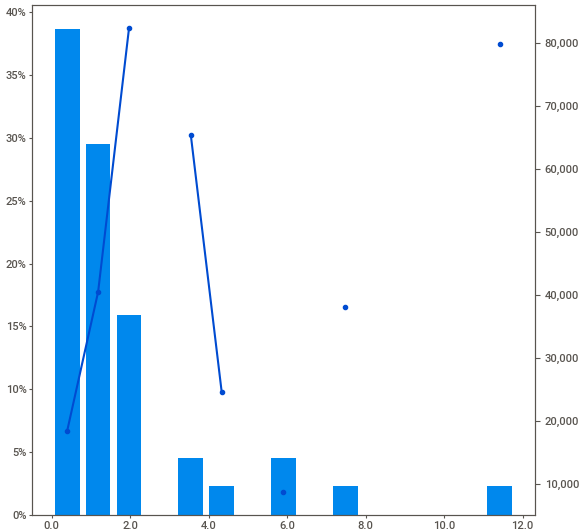
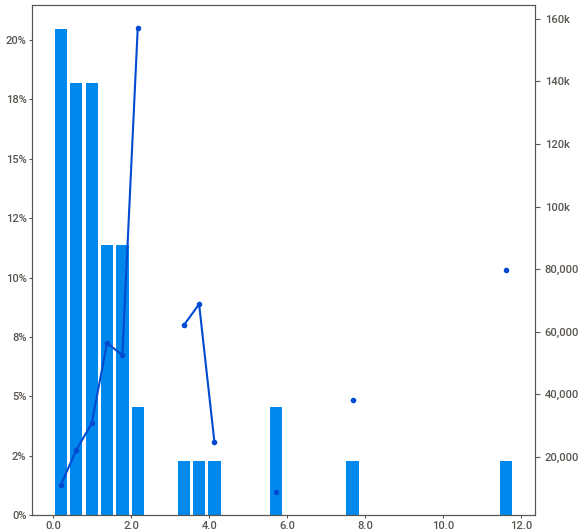
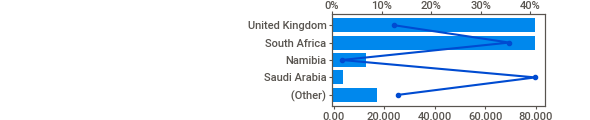
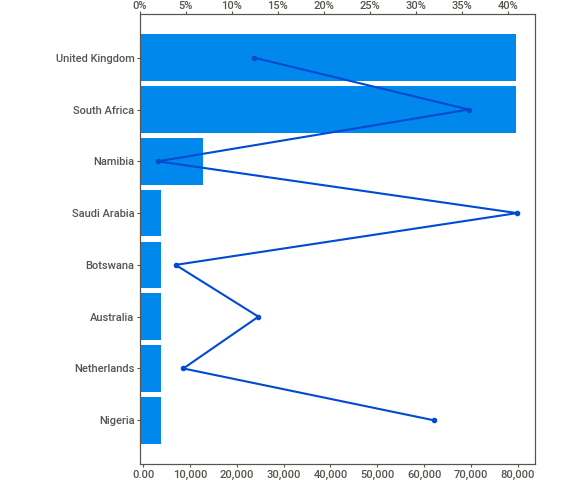
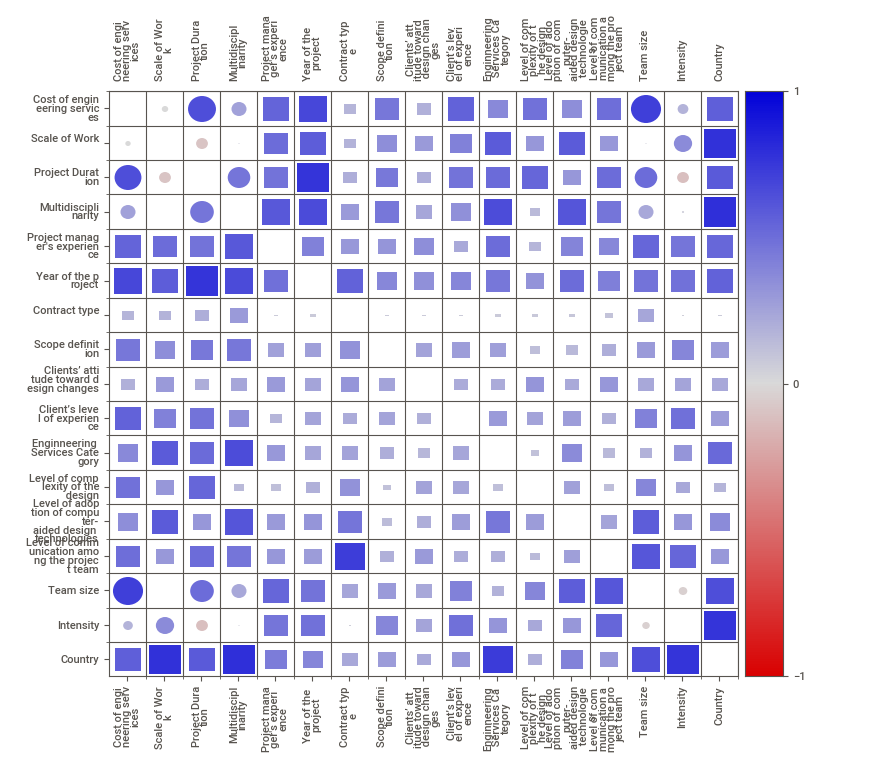
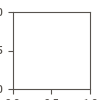

In [202]:
# Exploratory Data Analysis using Sweetviz

# Select features leading to the most interesting visualizations
# Analyzing the main features of the dataset
main_features_eda = sv.analyze(data,target_feat='Cost of engineering services')
# Display the report
main_features_eda.show_notebook(layout='vertical')

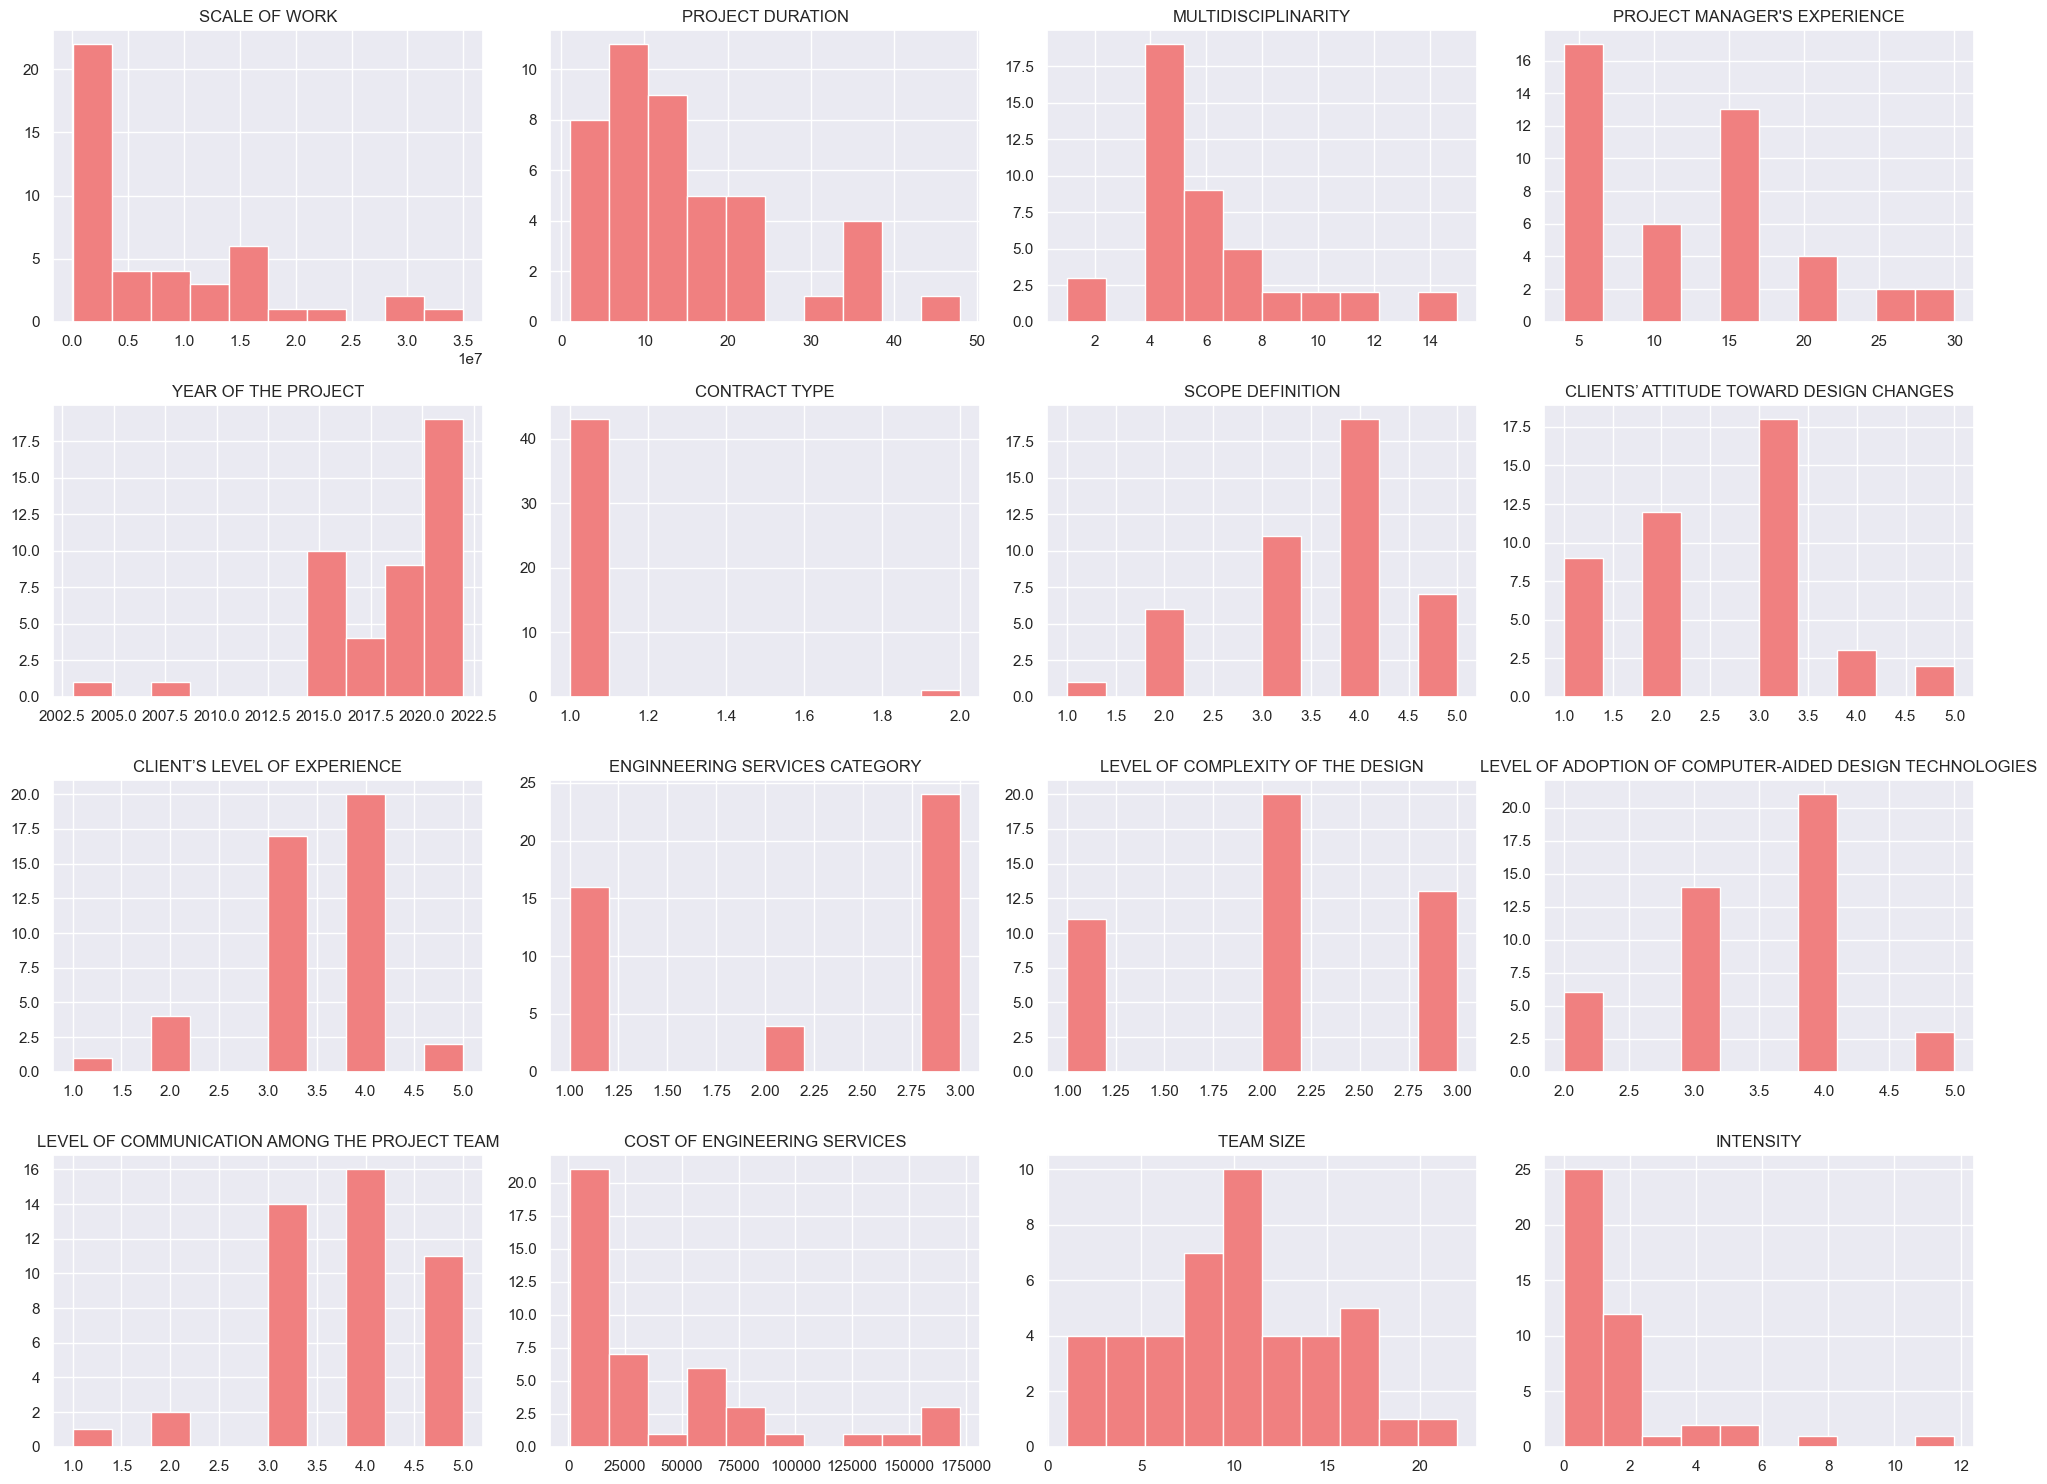

In [213]:
# Select the features for which we want to see distributions
columns_hist = [x for x in data.columns if x not in ["Country", "Project Location"]] 
columns_hist
sb.set(style="darkgrid")
colors = ["lightcoral", "#4374B3"]
sb.set_palette(sb.color_palette(colors))


# Create a function to plot our histograms
def plot_histograms(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize=(20,15))
    for i, col_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[col_name].hist(ax=ax)
        ax.set_title(col_name.upper())

    # To slightly improve appearance
    fig.tight_layout()  
    plt.show()

# Draw the plots
plot_histograms(data, columns_hist, 4, 4)
# columns_hist

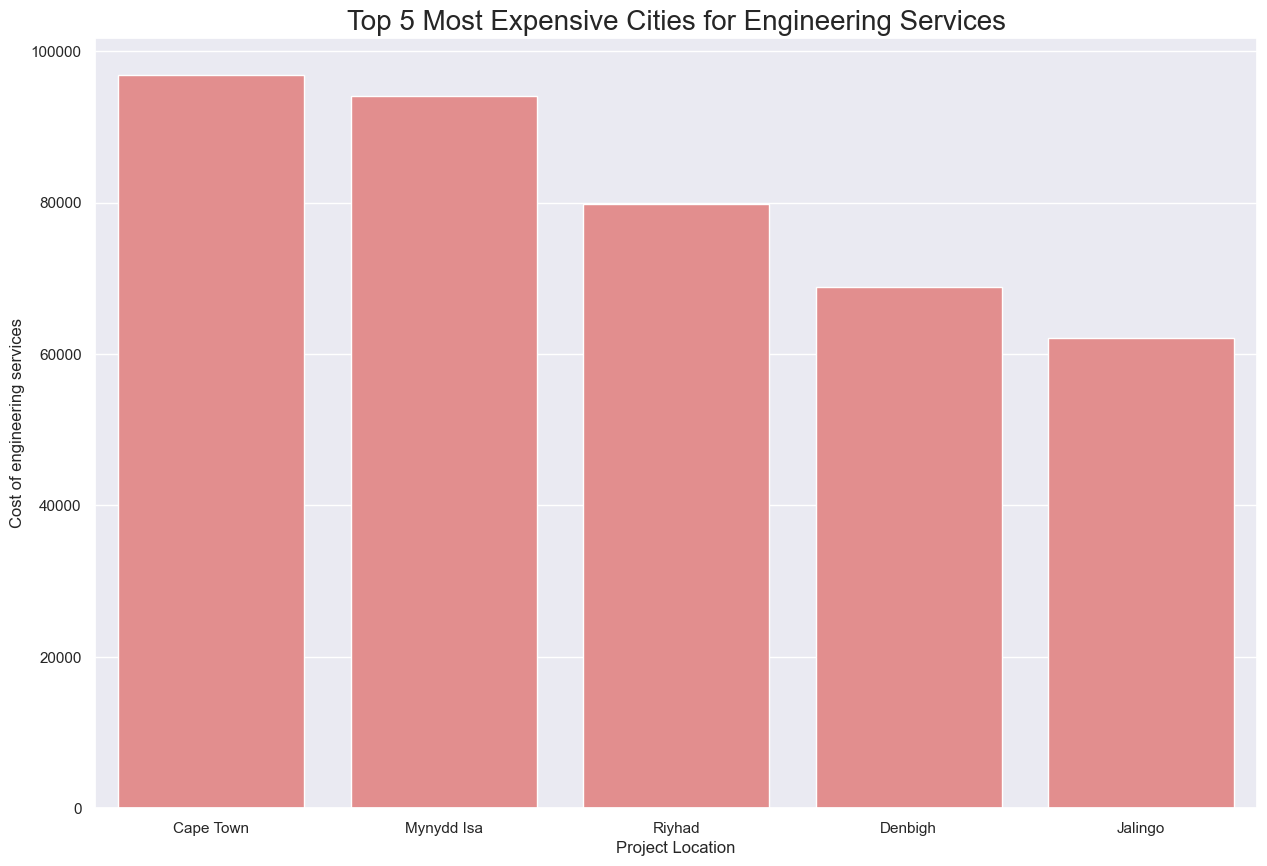

In [253]:
# top 5 average cost of enginering sevices by city
top_5_eng_city = data.groupby('Project Location', as_index=False)['Cost of engineering services'].mean().sort_values(by="Cost of engineering services", ascending=False)[:5]

#  Set the theme
sns.set(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the graph
ax = sns.barplot(x='Project Location', y='Cost of engineering services', data=top_5_eng_city, ax=ax1, color="lightcoral")

# Configure the title
plt.title('Top 5 Most Expensive Cities for Engineering Services', fontsize=20)

plt.show()

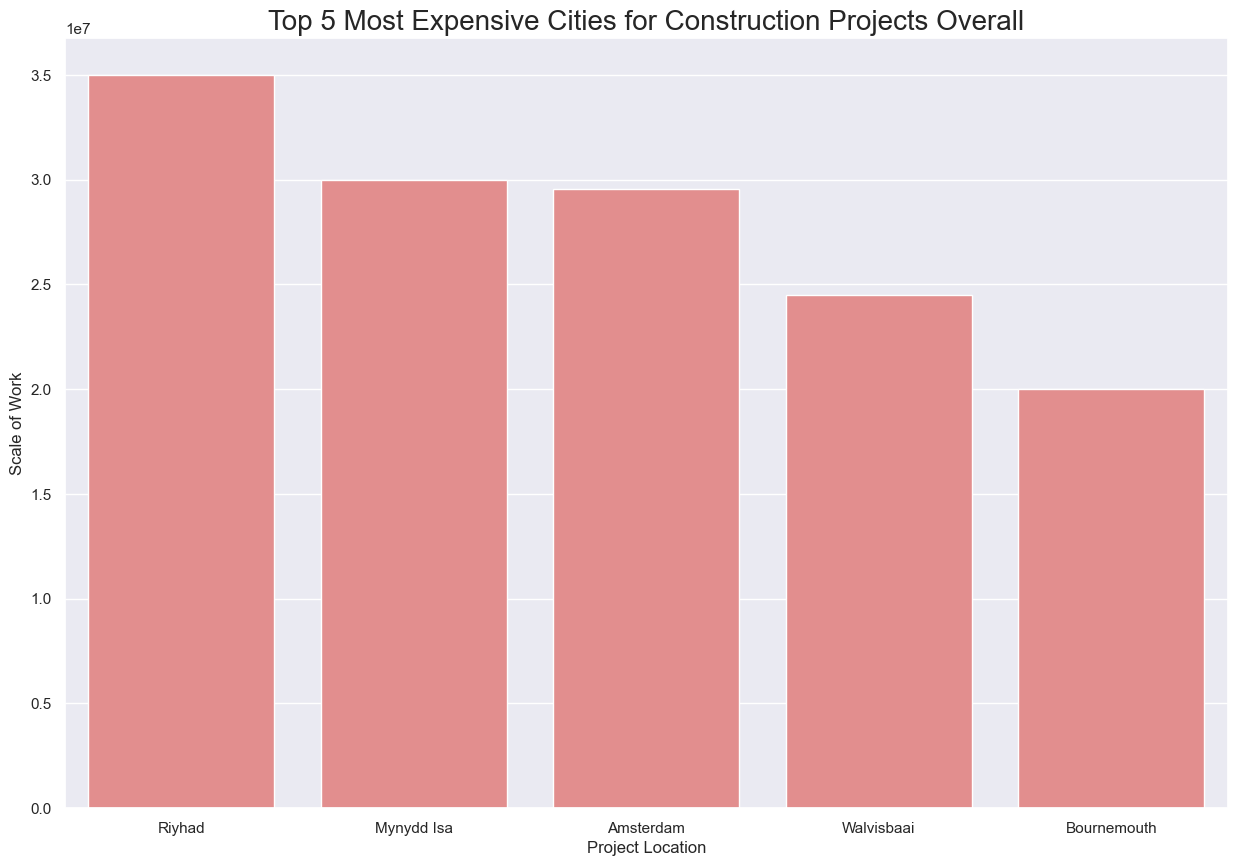

In [215]:
# top 5 average cost of construction by city
top_5_scale_eng_city = data.groupby('Project Location', as_index=False)['Scale of Work'].mean().sort_values(by="Scale of Work", ascending=False)[:5]

#  Set the theme
sns.set(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the graph
ax = sb.barplot(x='Project Location', y='Scale of Work', data=top_5_scale_eng_city, ax=ax1, color="lightcoral")

# Configure the title
plt.title('Top 5 Most Expensive Cities for Construction Projects Overall', fontsize=20)

plt.show()

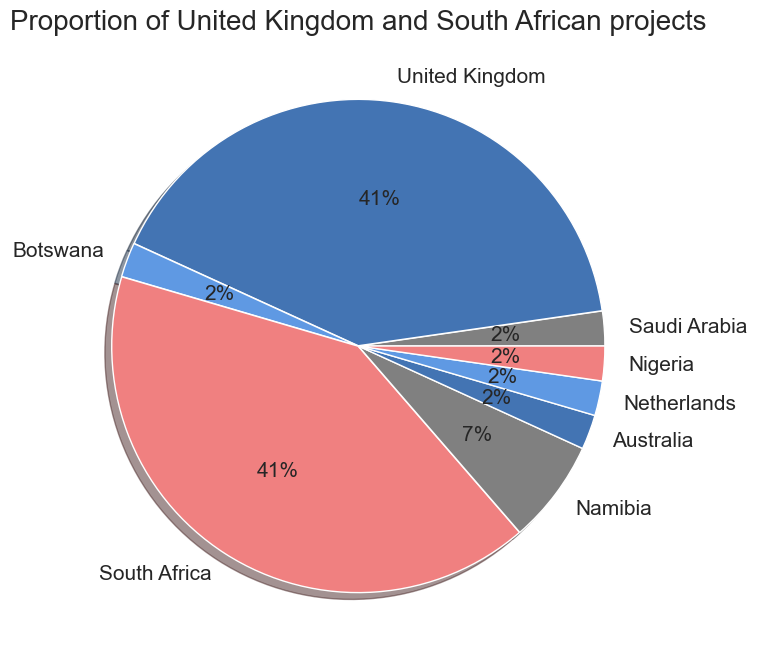

In [251]:
list_of_countries = []
labels_countries = []
# proportions of projects in each country
for i in data["Country"].unique():
    list_of_countries.append(len(data[data["Country"] == i]))
    labels_countries.append(i)

# Set the theme
colors = ["grey", "#4374B3", "#5f99e3", "lightcoral"]
sns.set_palette(sns.color_palette(colors))

plt.rcParams["figure.figsize"] = (8,8)

# Create a pieplot
plt.pie(list_of_countries, labels = labels_countries, explode=[0.001]*8, shadow=True, autopct='%.0f%%',textprops={'fontsize': 15})

#  Configure the title
plt.title("Proportion of United Kingdom and South African projects",fontsize=20)
plt.show()


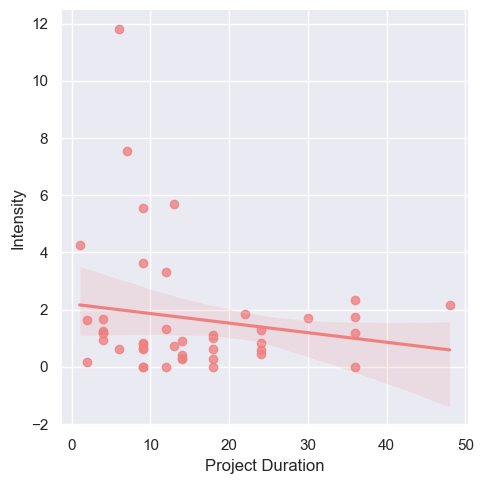

In [272]:
# intensity and project duration ( or intensity and technology)
colors = ["lightcoral", "#4374B3"]
sb.set_palette(sb.color_palette(colors))
# total construction vs cost of engineering services 
sb.lmplot(x="Project Duration", y="Intensity",
                 height=5,
                palette=["lightcoral"],
                data=data)

<AxesSubplot:xlabel='Scale of Work', ylabel='Cost of engineering services'>

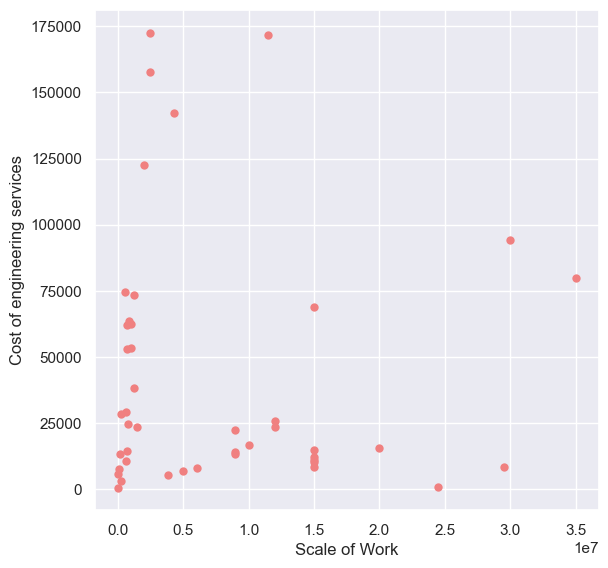

In [274]:
colors = ["lightcoral", "#4374B3"]
sb.set_palette(sb.color_palette(colors))
f, ax = plt.subplots(figsize=(6.5, 6.5))
# total construction vs cost of engineering services 
sns.scatterplot(x="Scale of Work", y="Cost of engineering services",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

In [ ]:
# standarized vs non starazied


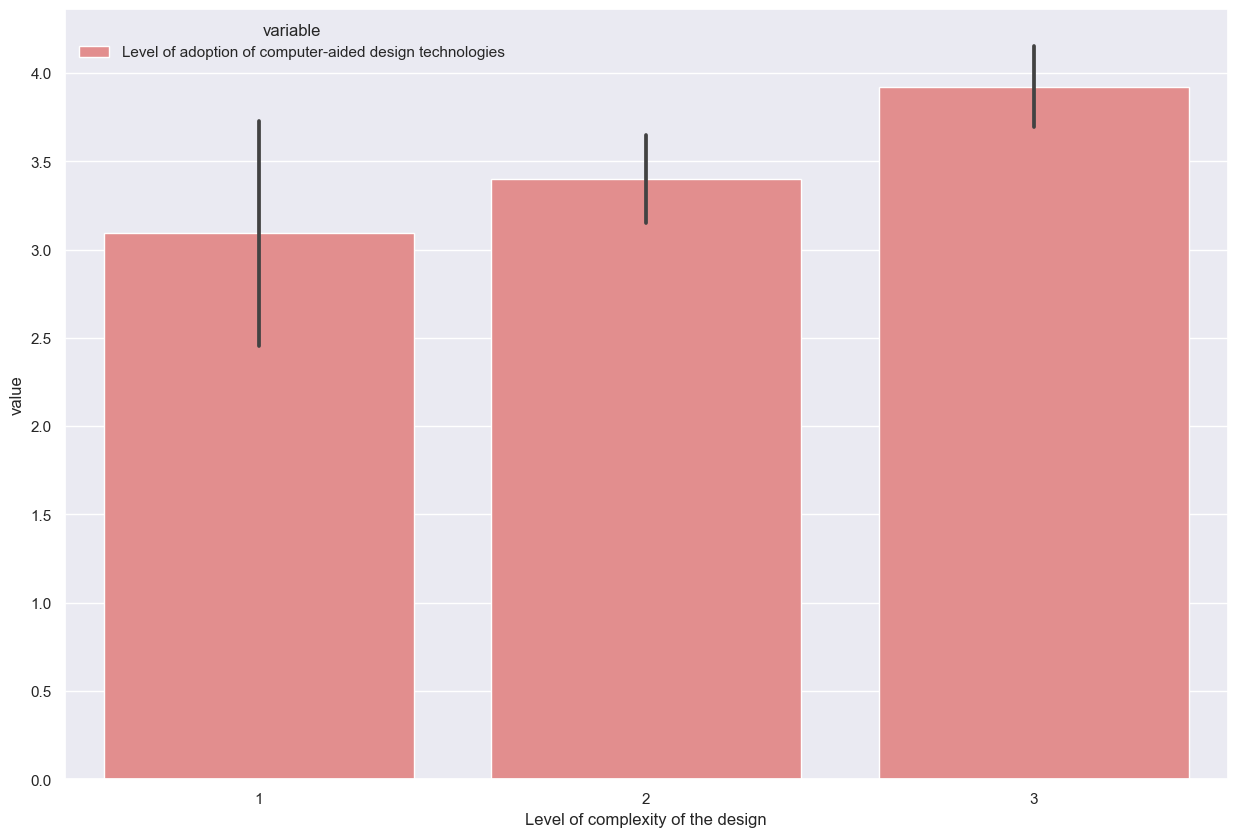

In [113]:
# complexity vs technology
fig, ax1 = plt.subplots(figsize=(15, 10))

data_comp_tech = data.melt(id_vars='Level of complexity of the design', value_vars=['Level of adoption of computer-aided design technologies'])
ax = sb.barplot(x='Level of complexity of the design', y='value', hue='variable', data=data_comp_tech, ax=ax1)


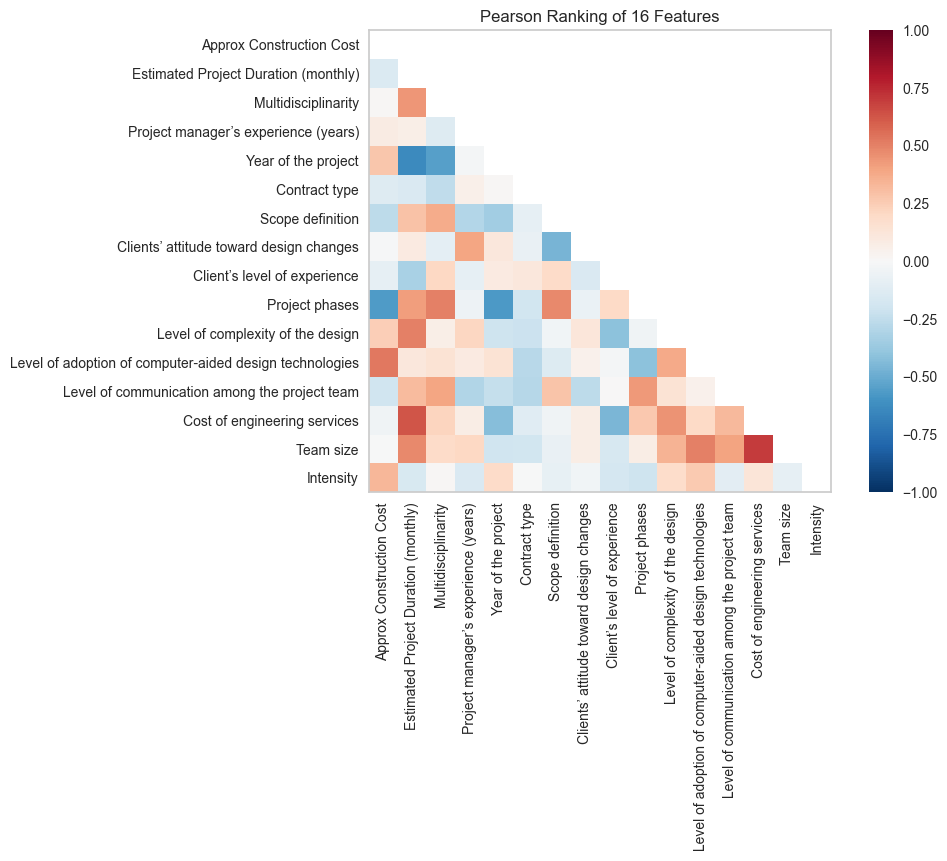

(2.0, 1.05)

In [50]:
fig, ax = plt.subplots(figsize = (10,6))

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(data)
visualizer.show()
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([2, 1.05])